In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# VGG16 is a specific CNN based model
from keras.applications.vgg16 import VGG16

In [4]:
# Loading the model as an object
model = VGG16()
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

- the output layer is to predict 1000 different classes so it has 1000 neurons
- The input images are color images from the imageNet dataset and the dimensions are 224x224x3 i.e. a color image.
- The `None` in the input layer is to indicate the number images (batch size) that will be sent to the model. It is determined at runtime so that is why initially it is `None`.
- In the first convolution layer, the number of filters are 64. (Number of channel = number of filters)
- Number of trainable parameters in input layer is 0 as there is nothing that can be changed or updated there.
- In CNN the number of trainable parameters are the weights and biases in the form of kernels.
- VGG16 is using 64 filters of dimension 3x3x3 in the 1st conv2d layer. The filter has 3 channels as the input image also has 3 channels.
- Calculating the number of trainable parameters for the first conv2D layer:<br>
  - Filter is of size 3x3x3 => 27 weights in 1 filter that needs to be trained
  - there are 64 filters in 1st layer => 64*27 = 1728 weights that need to be trained.
  - Each filter also has a bias associated with it, which means 64 filters will have 64 biases => 1728 + 64 = 1792 total trainable parameters.
- The bias for a filter is added to each value in that filter.
- The number of trainable parameters in maxpooling layer is 0 because these layers are responsible for reducing the dimensionality of the image and extracting important features.

In [5]:
# List of different layers in the model
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>,
 <Dense name=predictions, built=True>]

In [6]:
# Getting layer names
model.layers[1].name

'block1_conv1'

In [7]:
# Getting weights and biases for the convolution layer
for layer in model.layers:
  if 'conv' not in layer.name:
    print()
    continue
  filters,bias = layer.get_weights()#function returns and weights and biases of that layer
  print(layer.name,filters.shape, bias.shape)
  # The shape is form (width x height x channel x number of filter)


block1_conv1 (3, 3, 3, 64) (64,)
block1_conv2 (3, 3, 64, 64) (64,)

block2_conv1 (3, 3, 64, 128) (128,)
block2_conv2 (3, 3, 128, 128) (128,)

block3_conv1 (3, 3, 128, 256) (256,)
block3_conv2 (3, 3, 256, 256) (256,)
block3_conv3 (3, 3, 256, 256) (256,)

block4_conv1 (3, 3, 256, 512) (512,)
block4_conv2 (3, 3, 512, 512) (512,)
block4_conv3 (3, 3, 512, 512) (512,)

block5_conv1 (3, 3, 512, 512) (512,)
block5_conv2 (3, 3, 512, 512) (512,)
block5_conv3 (3, 3, 512, 512) (512,)







<h4>Observation</h4><br>
- The number of filters in previous layer matches the number of channels in the next layer.
- For e.g. : in the first conv2D layer there are 64 filters which means the output will have 64 feature maps stacked one over the other. So the next conv2D layer will get the input image with 64 channels so the filters also needs to have 64 channels. And this happens for all the layers.


- Keras.applications has many pretrained models
https://keras.io/api/applications/

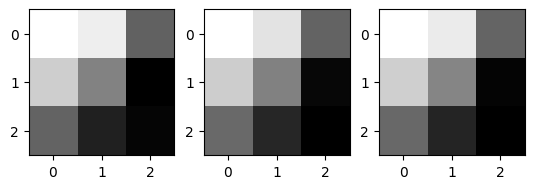

In [8]:
# Plotting filters as images
# the value of weights in the filter can be any real number
# Now there can be negative values as well, so now the question is how to plot a negative pixel
# Solution: Normalize the pixel values between 0 and 1 and plot them using imshow

from matplotlib import pyplot as plt

filters,bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max-f_min)

n_filter = 1 # How many fitlers to plot
for i in range(n_filter):
  f = filters[:,:,:,i]
  # take the entire filter and i controls which filter to choose
  # i.e. all the rows columns and channel of the i'th filter


  for j in range(3): # 3 channels for each filter
    plt.subplot(n_filter,3,j+1) # 3 is for 3 channels
    plt.imshow(f[:,:,j],cmap="gray")


- Looks like a corner filter

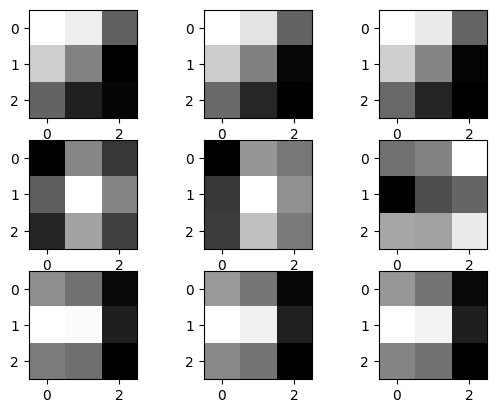

In [9]:
# Plotting filters as images
# the value of weights in the filter can be any real number
# Now there can be negative values as well, so now the question is how to plot a negative pixel
# Solution: Normalize the pixel values between 0 and 1 and plot them using imshow

from matplotlib import pyplot as plt

filters,bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min)/(f_max-f_min)

n_filter = 3
count = 1
for i in range(n_filter):
  f = filters[:,:,:,i]
  # take the entire filter and i controls which filter to choose
  # i.e. all the rows columns and channel of the i'th filter


  for j in range(3): # 3 channels for each filter
    plt.subplot(n_filter,3,count) # 3 is for 3 channels
    count+=1
    plt.imshow(f[:,:,j],cmap="gray")


In [10]:
# Examining Feature Maps
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

# loading the image
img = load_img("/content/drive/MyDrive/bird.jpg",target_size=(224,224))
# img is an object so it needs to be converted to array

img_arr = img_to_array(img)
img_arr = expand_dims(img_arr,axis=0) # the batch size also needs to be added
# to show 1 image => 1x224x224x3

img_pre_process = preprocess_input(img_arr) # Pre processing for VGG16

In [11]:
# Now to pass the input through 1st conv2D layer and see the output of that layer
from keras.models import Model
# this module can help replicate already created Model
# in our case we will simply recreate only the first layer of VGG16
# so the input will be same to both VGG16 and the cusotm model
# however in output we will mention the output of 1st conv2D layer

cust_model = Model(inputs =model.inputs, outputs = model.layers[1].output )


In [12]:
feature_map = cust_model(img_pre_process)
# feature_map has 64 images/channels

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


In [13]:
feature_map.shape

TensorShape([1, 224, 224, 64])

- 1 image where each chanel is of 224 x 224 and there are 64 such channels

In [14]:
import cv2
import numpy as np

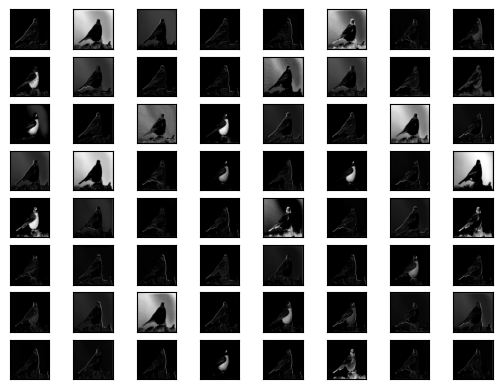

In [15]:
square = 8
ix = 1

for _ in range(square):
  for _ in range(square):
    sp = plt.subplot(square,square, ix)
    sp.set_xticks([])
    sp.set_yticks([])
    plt.imshow(feature_map[0,:,:,ix-1], cmap = 'gray')
    name = str(ix)+".jpg"
    # plt.imsave(name,feature_map[0,:,:,ix-1])
    cv2.imwrite(name,feature_map[0,:,:,ix-1].numpy())
    ix = ix+1
plt.show()